In [1]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
#import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

#import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
#import matplotlib.gridspec as gridspec
#import seaborn as sns; sns.set()
import ast

from datetime import date, time, datetime
import calendar

In [2]:
def read_file():
    full_data = pd.DataFrame()
    for file in os.listdir():
        if 'compiled' in file:
            data = pd.read_csv(file, index_col = 0)
            full_data = full_data.append(data)
    return full_data

In [3]:
data = read_file()

In [4]:
data = data.drop_duplicates()

## General counts

In [5]:
data

,url,name,neighbourhood,price,categories,review,user,date
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm
...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020"
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020"
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020"
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020"


In [6]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28731
No. restaurants: 863


## Clean Cost Column 

In [7]:
data['cleaned_price'] = data['price'].apply(lambda x: int(x.split('/')[0].replace('~$','')) if '$' in x else np.nan)
data.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0


## Clean Categories

In [8]:
category_mapping = {'Steak':['Western'], 
 'Cocktails':['Alcohol','Drinks'], 
 'Great View': ['Good Environment'], 
 'Sushi':['Japanese'], 
 'Ramen':['Japanese','Noodles'], 
 'Islandwide Delivery':['Convenient'], 
 'Craft Beer':['Drinks','Alcohol'], 
 '1 For 1 Deals':['Value'],
 'Teppanyaki':['Japanese'], 
 'Sustainable Dining on Beyond':['Sustainable'], 
 'Vegan friendly':['Sustainable'], 
 'Kopitiam':['Local Delights'], 
 'Char Kway Teow':['Local Delights','Noodles','Chinese'], 
 'Taiwanese':['Chinese'], 
 'Waffles':['Desserts'], 
 'Zi Char':['Local Delights','Chinese'], 
 'Fruit Tea':['Drinks'], 
 'Pasta':['Western','Noodles'], 
 'Vouchers':['Value'], 
 'Chirashi':['Japanese'], 
 'Bars':['Alcohol','Drinks'], 
 'Burpple Beyond Deals 💰':['Value'], 
 'BITES':['Bites'],
 'Burpple Guides':['Recommended'],
 'Michelin Guide Singapore 2018':['Recommended'],
'Grill & BBQ':['Western','BBQ'], 
'Bread & Pastries':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Vegetarian friendly':['Sustainable'], 
 'Cheap & Good':['Value'], 
 'Mediterranean':['European'], 
 'Middle Eastern': ['European'],
 'Michelin Guide Singapore 2017':['Recommended'], 
 'Hawker Food':['Local Delights'], 
 'Ice Cream & Yoghurt':['Desserts'], 
 'Cafes & Coffee':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Interesting':['Good Environment'],
'Dinner with Drinks':['Drinks'], 
'Bak Kut Teh':['Local Delights', 'Chinese'],
'Burgers':['Western'],
'Korean Desserts': ['Desserts','Korean'],
 'Vegetarian':['Sustainable'], 
 'Nasi Lemak':['South East Asian','Local Delights'], 
 'Salads':['Western'], 
'TAKEAWAY OPTION':['Convenient'],
'Delivery':['Convenient'], 
'Sandwiches':['High Tea', 'Breakfast & Brunch', 'Western'], 
'Pizza':['Western'],
'Vegan':['Sustainable'], 
'Dim Sum':['Chinese'], 
'Chicken Rice':['Local Delights','Chinese'], 
'Fried Chicken':['Korean', 'Western', 'Bites','Fast Food'], 
'Korean BBQ':['Korean','BBQ'],
'Filipino Local Delights':['Filipino'], 
'Cakes':['Desserts','High Tea'], 
'Michelin Guide Singapore 2019':['Recommended'],
 'Korean Fried Chicken':['Korean','Bites','Fast Food'], 
'Hot Pot': ['Chinese', 'Rainy Day Comforts'], 
'Soup': ['Rainy Day Comforts'],
'Late Night':['Supper'],
 'Bubble Tea':['Drinks'],
 'BEYOND': ['Recommended', 'Value'],
 'Argentinian':['European'],
 'Filipino Local Delights': ['South East Asian'],
 'Indonesian': ['South East Asian'],
 'Malay': ['South East Asian'],
 'Vietnamese':['South East Asian'],
 'Peranakan': ['South East Asian'],
 'Thai': ['South East Asian'],
 'Greek':['European'],
 'Russian': ['European'],
 'Turkish': ['European'],
 'Mexican': ['European'],
 'Spanish': ['European'],
 'Newly Opened': ['Novel'],
 'Hidden Gem':['Novel'],
 'French': ['European'],
 'Italian': ['European'],
 'Kid Friendly': ['Accessible'],
 'Pet-Friendly': ['Accessible'],
 'Good For Groups': ['Accessible']
 }

In [9]:
# find unique categories 
def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

In [10]:
find_unique_categories('categories', data)

Num of Categories:101
Korean Fried Chicken
Chinese
Cakes
Burgers
Vietnamese
Cafes & Coffee
Korean
Halal
Korean Desserts
Thai
Chirashi
Michelin Guide Singapore 2018
Cheap & Good
Vegan friendly
Waffles
Fine Dining
Turkish
High Tea
1 For 1 Deals
Japanese
Sushi
Middle Eastern
Date Night
Spanish
Bites
Zi Char
Sustainable Dining on Beyond
Sandwiches
Ramen
Late Night
Kopitiam
Local Delights
Craft Beer
Malay
Noodles
Taiwanese
Interesting
Dinner with Drinks
BEYOND
Peranakan
Seafood
Dim Sum
Fried Chicken
Michelin Guide Singapore 2017
Breakfast & Brunch
TAKEAWAY OPTION
Steak
Soup
Korean BBQ
Vegetarian friendly
Rainy Day Comforts
Bars
Kid Friendly
Supper
Cocktails
Mediterranean
Vegan
Chicken Rice
Pizza
Filipino Local Delights
Islandwide Delivery
Fast Food
Hot Pot
Teppanyaki
Greek
Italian
Hidden Gem
Newly Opened
Healthy
Russian
Burpple Guides
BITES
Bubble Tea
Salads
Good For Groups
Fruit Tea
Hawker Food
Vegetarian
Grill & BBQ
Pet-Friendly
European
Burpple Beyond Deals 💰
Buffets
Char Kway Teow
Frenc

['Korean Fried Chicken',
 'Chinese',
 'Cakes',
 'Burgers',
 'Vietnamese',
 'Cafes & Coffee',
 'Korean',
 'Halal',
 'Korean Desserts',
 'Thai',
 'Chirashi',
 'Michelin Guide Singapore 2018',
 'Cheap & Good',
 'Vegan friendly',
 'Waffles',
 'Fine Dining',
 'Turkish',
 'High Tea',
 '1 For 1 Deals',
 'Japanese',
 'Sushi',
 'Middle Eastern',
 'Date Night',
 'Spanish',
 'Bites',
 'Zi Char',
 'Sustainable Dining on Beyond',
 'Sandwiches',
 'Ramen',
 'Late Night',
 'Kopitiam',
 'Local Delights',
 'Craft Beer',
 'Malay',
 'Noodles',
 'Taiwanese',
 'Interesting',
 'Dinner with Drinks',
 'BEYOND',
 'Peranakan',
 'Seafood',
 'Dim Sum',
 'Fried Chicken',
 'Michelin Guide Singapore 2017',
 'Breakfast & Brunch',
 'TAKEAWAY OPTION',
 'Steak',
 'Soup',
 'Korean BBQ',
 'Vegetarian friendly',
 'Rainy Day Comforts',
 'Bars',
 'Kid Friendly',
 'Supper',
 'Cocktails',
 'Mediterranean',
 'Vegan',
 'Chicken Rice',
 'Pizza',
 'Filipino Local Delights',
 'Islandwide Delivery',
 'Fast Food',
 'Hot Pot',
 'Teppan

In [11]:
# map categories
all_new_categories = []
for idx, row in data.iterrows():
    categories = ast.literal_eval(row['categories'])
    new_categories = []
    for category in categories:
        if category.strip() in category_mapping.keys():
            new_categories.extend(category_mapping[category.strip()])
        else:
            new_categories.append(category)
    all_new_categories.append(new_categories)

data['cleaned_categories'] = all_new_categories

In [12]:
# find unique categories after mapping
list_cleaned_categories = find_unique_categories('cleaned_categories', data)

Num of Categories:32
Date Night
Chinese
Bites
South East Asian
Good Environment
Korean
Halal
Local Delights
European
Buffets
Rainy Day Comforts
Supper
Indian
BBQ
Noodles
Recommended
Desserts
Drinks
Sustainable
Fine Dining
Fast Food
Value
Accessible
Alcohol
Convenient
High Tea
Novel
Seafood
Japanese
Western
Healthy
Breakfast & Brunch


## Check for null values

In [13]:
# Check if there is any null value
data.isna().apply(pd.value_counts)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories
False,28731.0,28731.0,28708,28731.0,28731.0,28731.0,28731.0,28731.0,28302,28731.0
True,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,429,NaN


In [14]:
# 89 reviews have no neighbourhood. Thus, we drop these reviews.
cleaned_data = data[~data['neighbourhood'].isna()]

# 1781 reviews have no price. Thus, we drop these reviews.
cleaned_data = data[~data['cleaned_price'].isna()]

In [15]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(cleaned_data)}')
# Number of restaurants with reviews
num = len(cleaned_data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28302
No. restaurants: 845


## Convert Cat Variables to Binary Variables

In [16]:
list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)
list_cleaned_categories

Num of Categories:32
Date Night
Chinese
Bites
South East Asian
Good Environment
Korean
Halal
Local Delights
European
Buffets
Rainy Day Comforts
Supper
Indian
BBQ
Noodles
Recommended
Desserts
Drinks
Sustainable
Fine Dining
Fast Food
Value
Accessible
Alcohol
Convenient
High Tea
Novel
Seafood
Japanese
Western
Healthy
Breakfast & Brunch


['Date Night',
 'Chinese',
 'Bites',
 'South East Asian',
 'Good Environment',
 'Korean',
 'Halal',
 'Local Delights',
 'European',
 'Buffets',
 'Rainy Day Comforts',
 'Supper',
 'Indian',
 'BBQ',
 'Noodles',
 'Recommended',
 'Desserts',
 'Drinks',
 'Sustainable',
 'Fine Dining',
 'Fast Food',
 'Value',
 'Accessible',
 'Alcohol',
 'Convenient',
 'High Tea',
 'Novel',
 'Seafood',
 'Japanese',
 'Western',
 'Healthy',
 'Breakfast & Brunch']

In [17]:
# append empty columns with category names
cleaned_data = cleaned_data.reindex(cleaned_data.columns.tolist() + list_cleaned_categories, axis=1)

In [18]:
for category in list_cleaned_categories:
    print(category)
    cleaned_data[category] = cleaned_data['cleaned_categories'].apply(lambda x: 1 if category in x else 0)

Date Night
Chinese
Bites
South East Asian
Good Environment
Korean
Halal
Local Delights
European
Buffets
Rainy Day Comforts
Supper
Indian
BBQ
Noodles
Recommended
Desserts
Drinks
Sustainable
Fine Dining
Fast Food
Value
Accessible
Alcohol
Convenient
High Tea
Novel
Seafood
Japanese
Western
Healthy
Breakfast & Brunch


## Mapping Neighbourhoods to Regions

In [19]:
neighbourhood_to_region_mapping = pd.read_excel('neighbourhood_to_region_mapping.xlsx')
neighbourhood_to_region_mapping['neighbourhood'] = neighbourhood_to_region_mapping['neighbourhood'].apply(lambda x: x.replace('\xa0',''))
neighbourhood_to_region_mapping = neighbourhood_to_region_mapping.set_index('neighbourhood').T.to_dict('records')[0]

In [20]:
cleaned_data['region'] = cleaned_data['neighbourhood'].apply(lambda x: neighbourhood_to_region_mapping[x])

In [21]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Alcohol,Convenient,High Tea,Novel,Seafood,Japanese,Western,Healthy,Breakfast & Brunch,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central


In [22]:
cleaned_data.to_csv('cleaned_restaurant_reviews.csv')

## Categorical EDA

In [23]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Alcohol,Convenient,High Tea,Novel,Seafood,Japanese,Western,Healthy,Breakfast & Brunch,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central


Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories) DONE
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest) DONE
Box and whiskers plot for price data DONE
Normal distribution chart for price data 
Number of reviews per date

#### Bar Chart of Restaurants by Neighbourhood

In [24]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

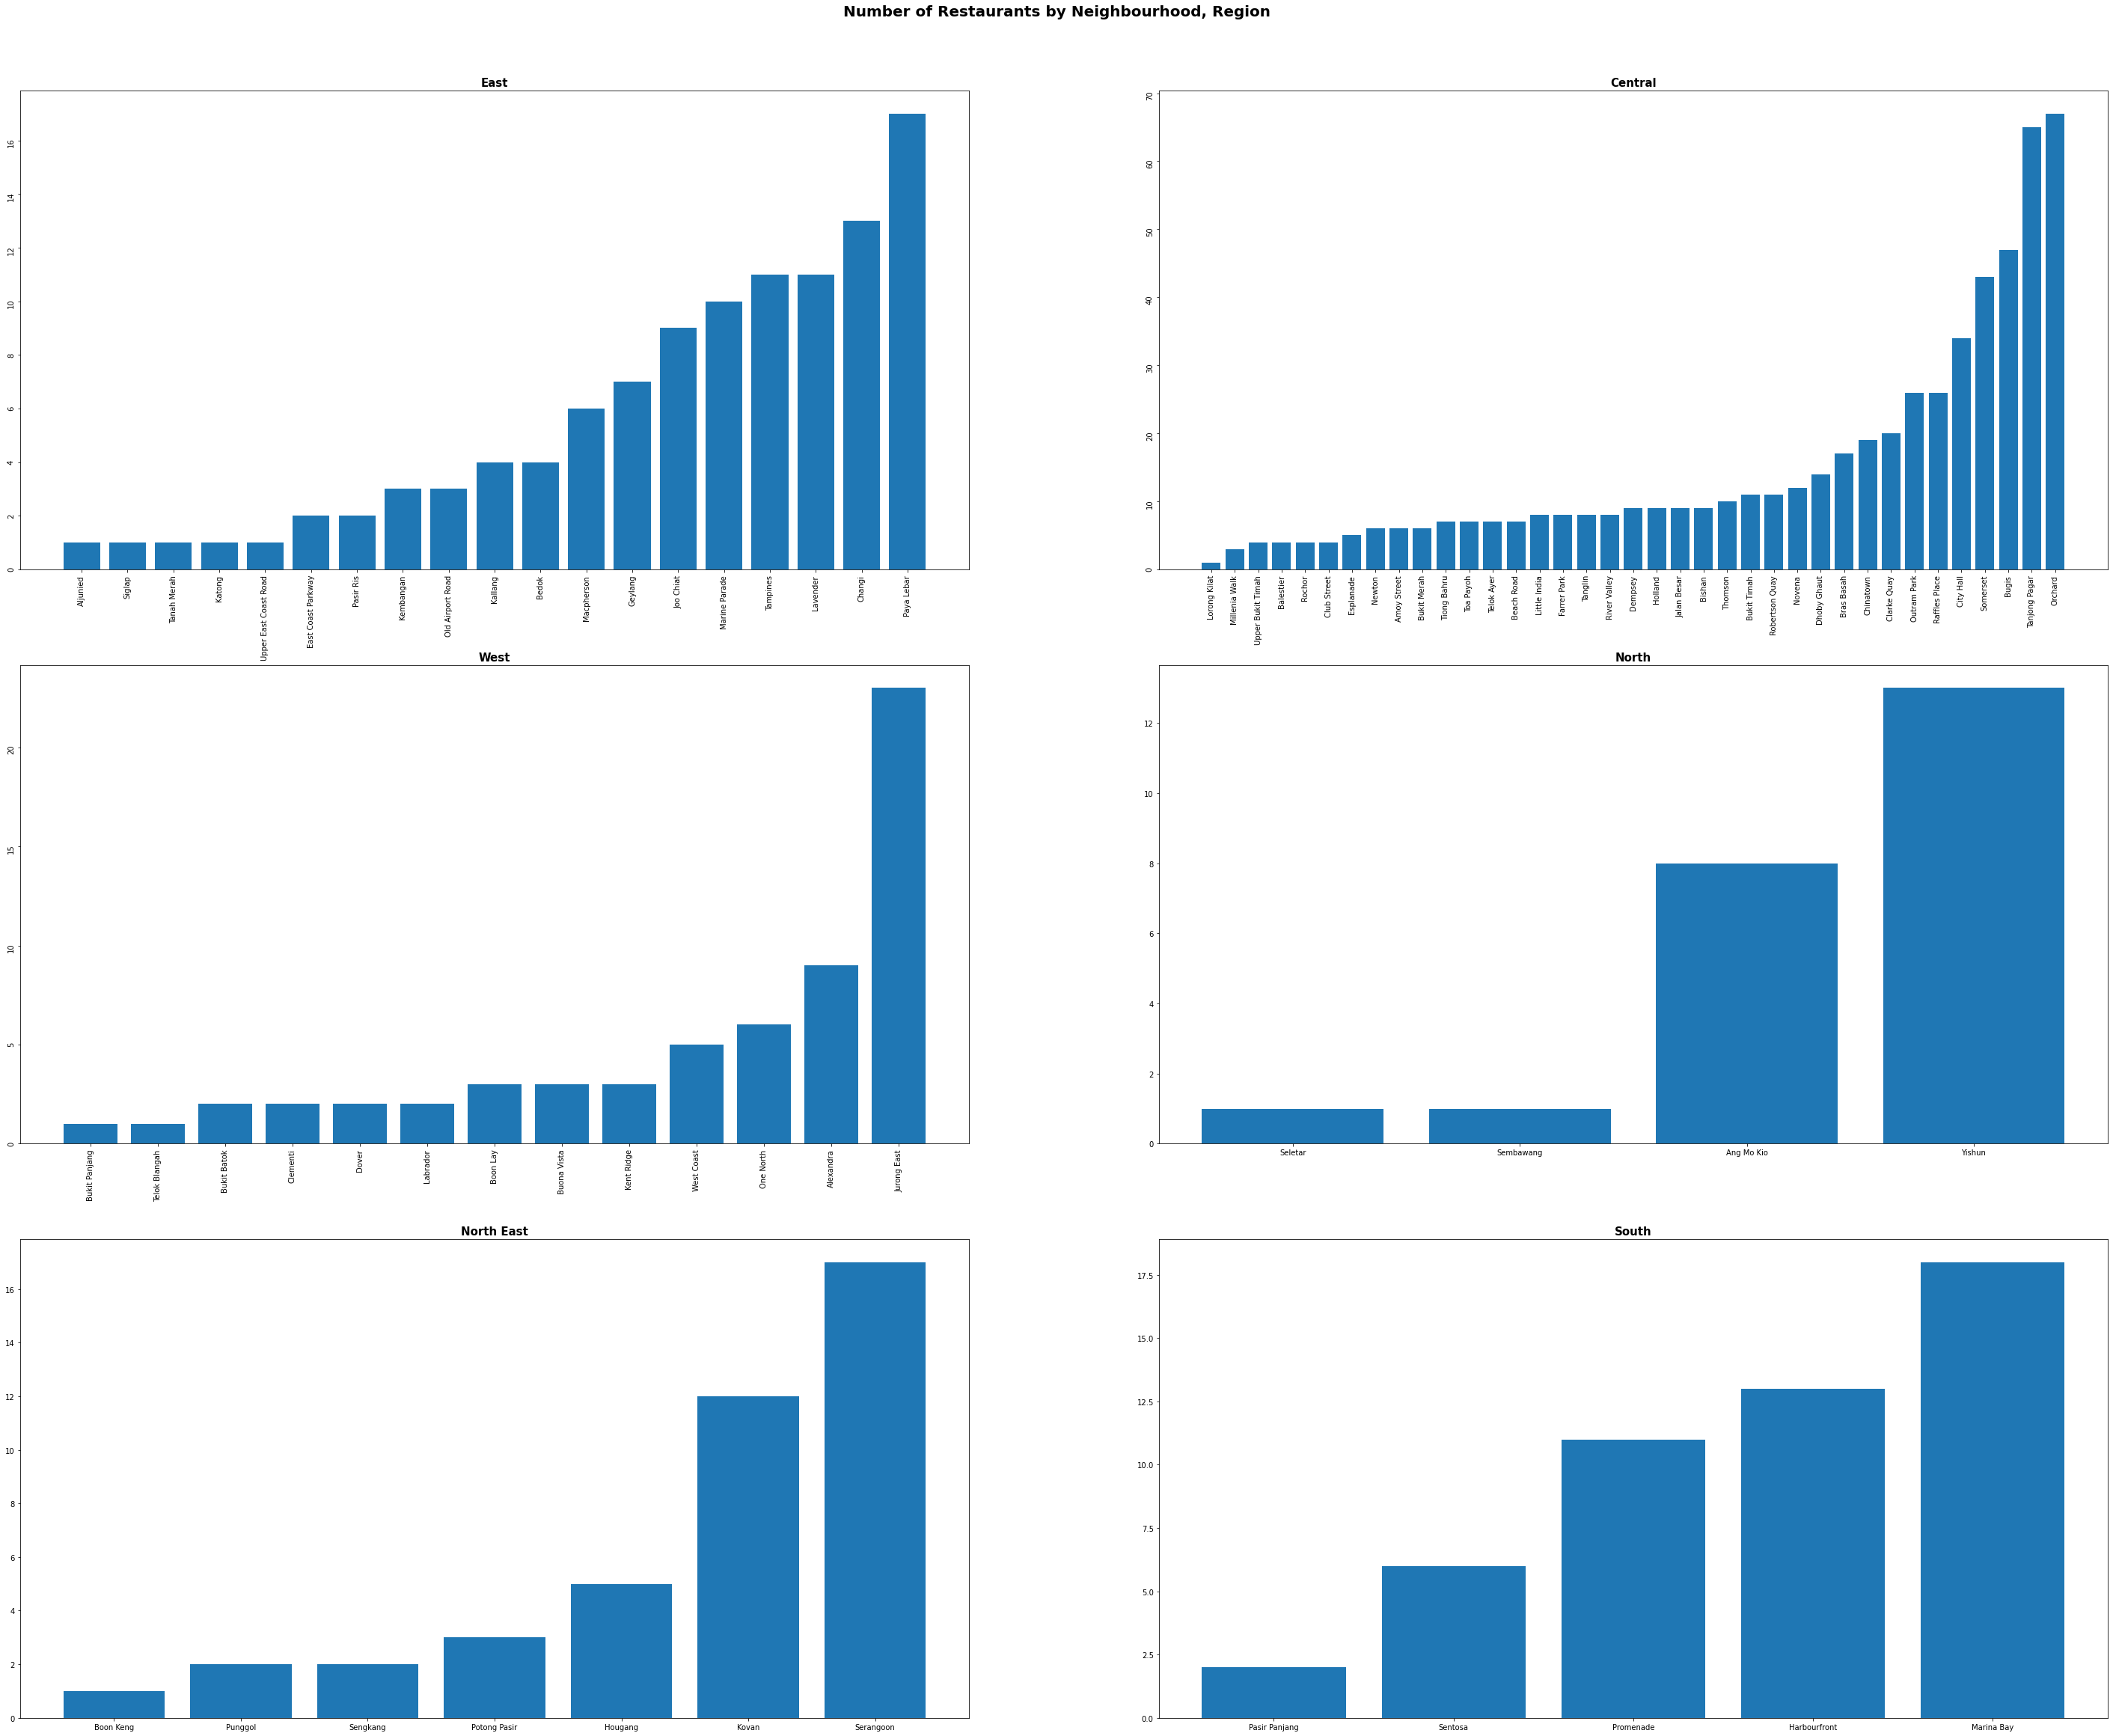

In [25]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [26]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

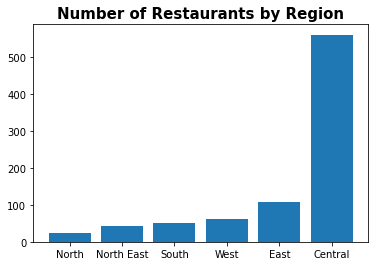

In [27]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [28]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

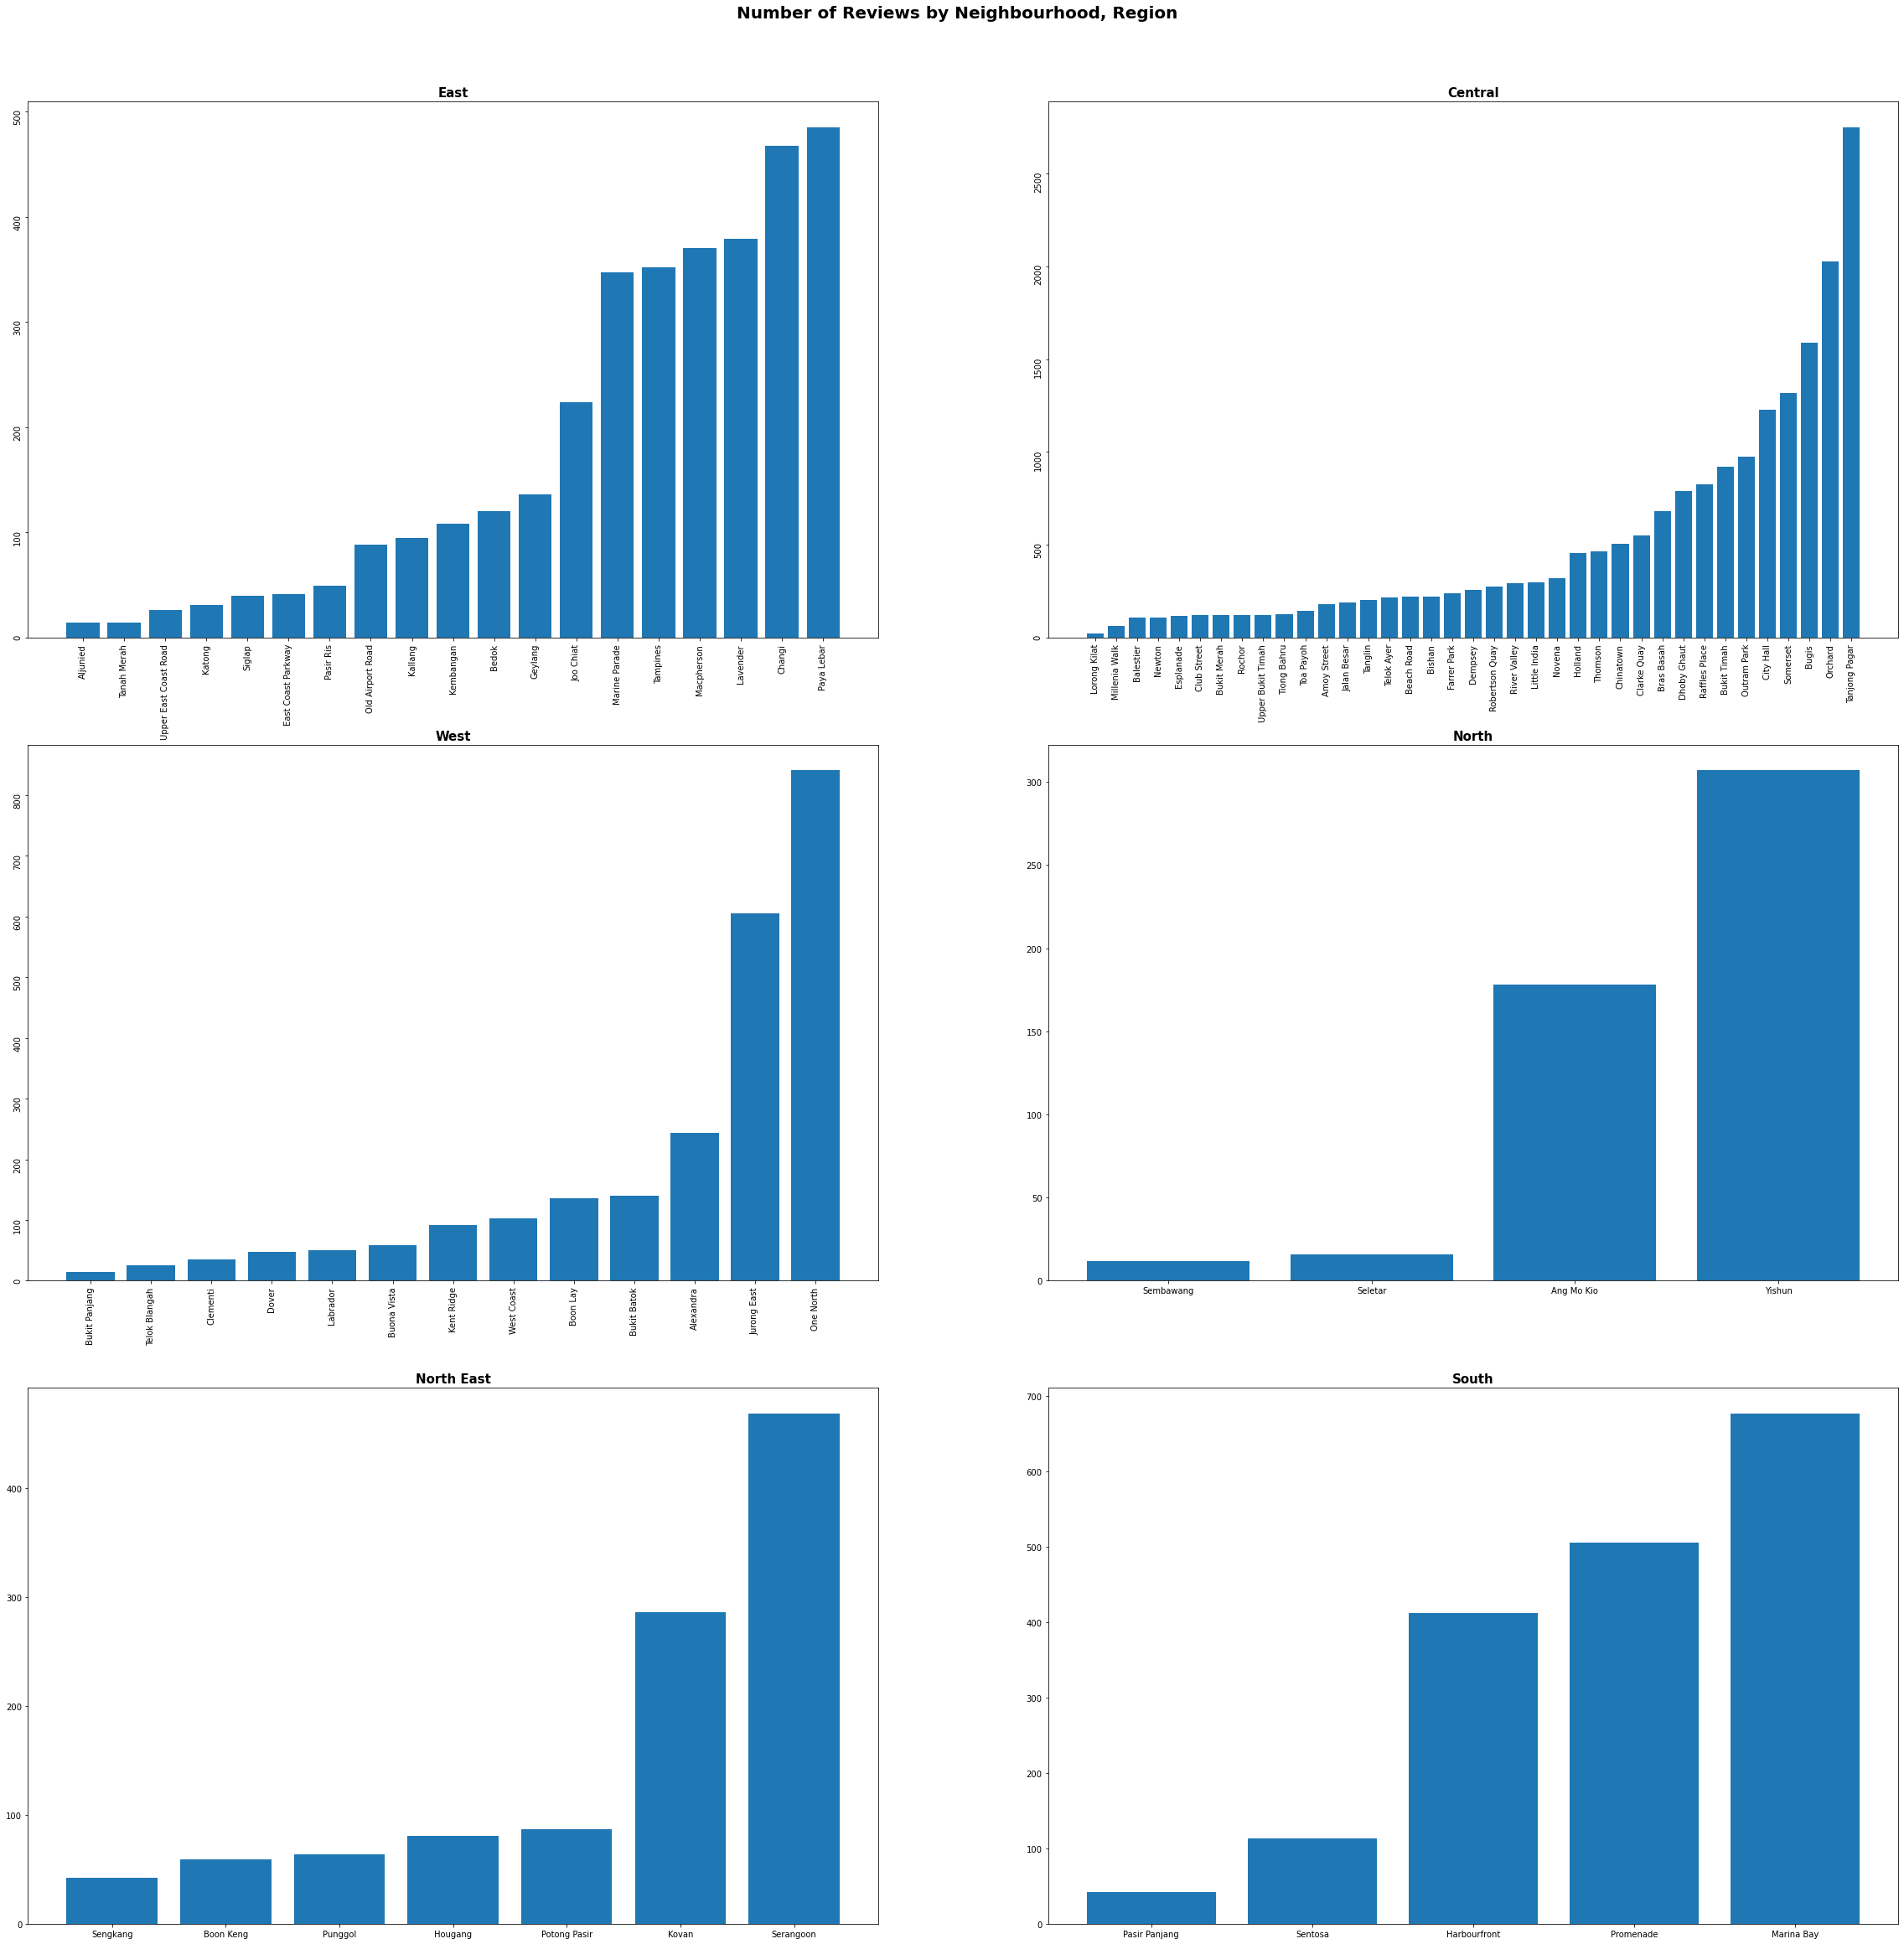

In [29]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Reviews by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [30]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

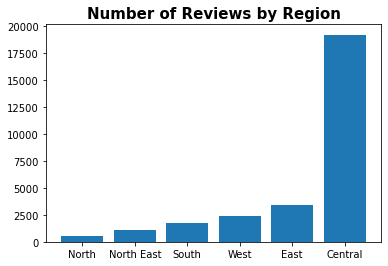

In [31]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [32]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('cleaned_categories')+1:-1]
rest_cat_df['url'] = cleaned_data['url']


In [33]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [34]:
rest_cat_counts

,index,0
4,Good Environment,10
13,BBQ,13
26,Novel,14
12,Indian,15
20,Fast Food,20
2,Bites,20
10,Rainy Day Comforts,21
30,Healthy,22
9,Buffets,23
19,Fine Dining,24


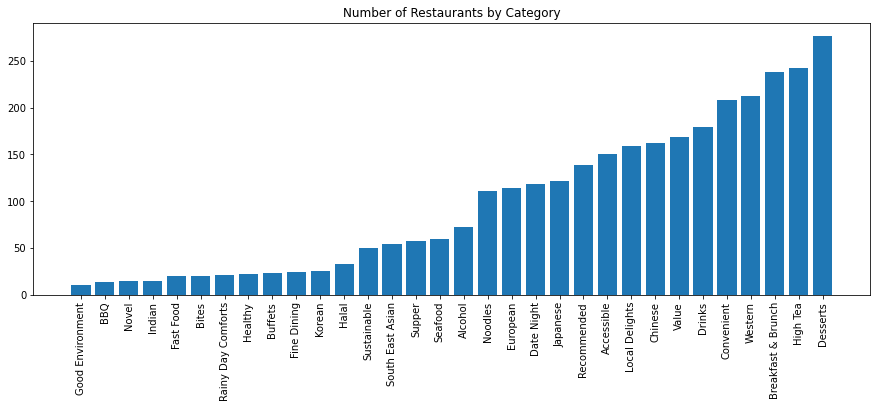

In [35]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Reviews by Category

In [36]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [37]:
reviews_cat_df

,index,0
12,Indian,280
4,Good Environment,341
13,BBQ,361
10,Rainy Day Comforts,444
19,Fine Dining,533
26,Novel,540
9,Buffets,585
20,Fast Food,723
6,Halal,885
5,Korean,886


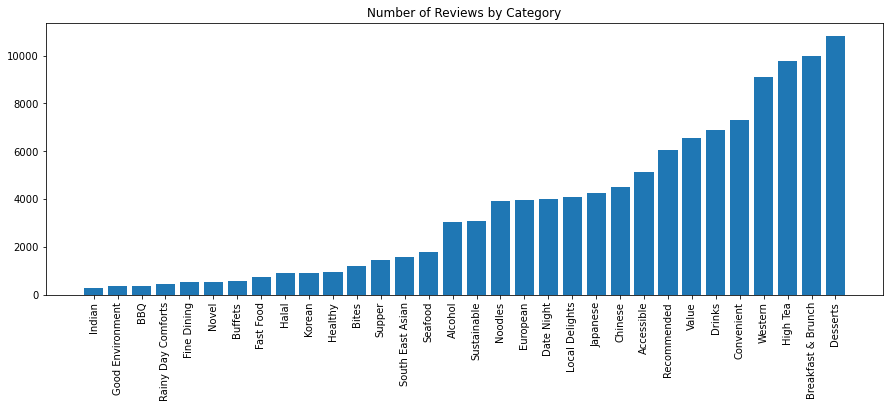

In [38]:
plt.figure(figsize=(15,5))
plt.bar(reviews_cat_df['index'], reviews_cat_df[0])
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Category')
plt.show()

#### Histogram of Number of reviews by Restaurant

In [39]:
num_reviews_by_rest = pd.DataFrame(cleaned_data.groupby('url')['name'].count()).reset_index()

In [40]:
num_reviews_by_rest.describe()

,name
count,845.000000
mean,33.493491
std,32.602177
min,10.000000
25%,16.000000
50%,24.000000
75%,38.000000
max,357.000000


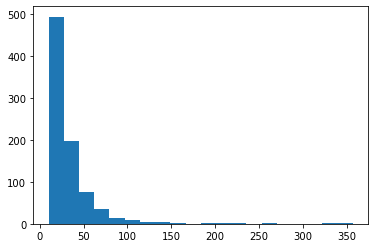

In [41]:
plt.hist(num_reviews_by_rest['name'], bins = 20)
plt.show()

#### Box & Whiskers For Price By Category

In [42]:
box_df = cleaned_data.drop_duplicates('url')

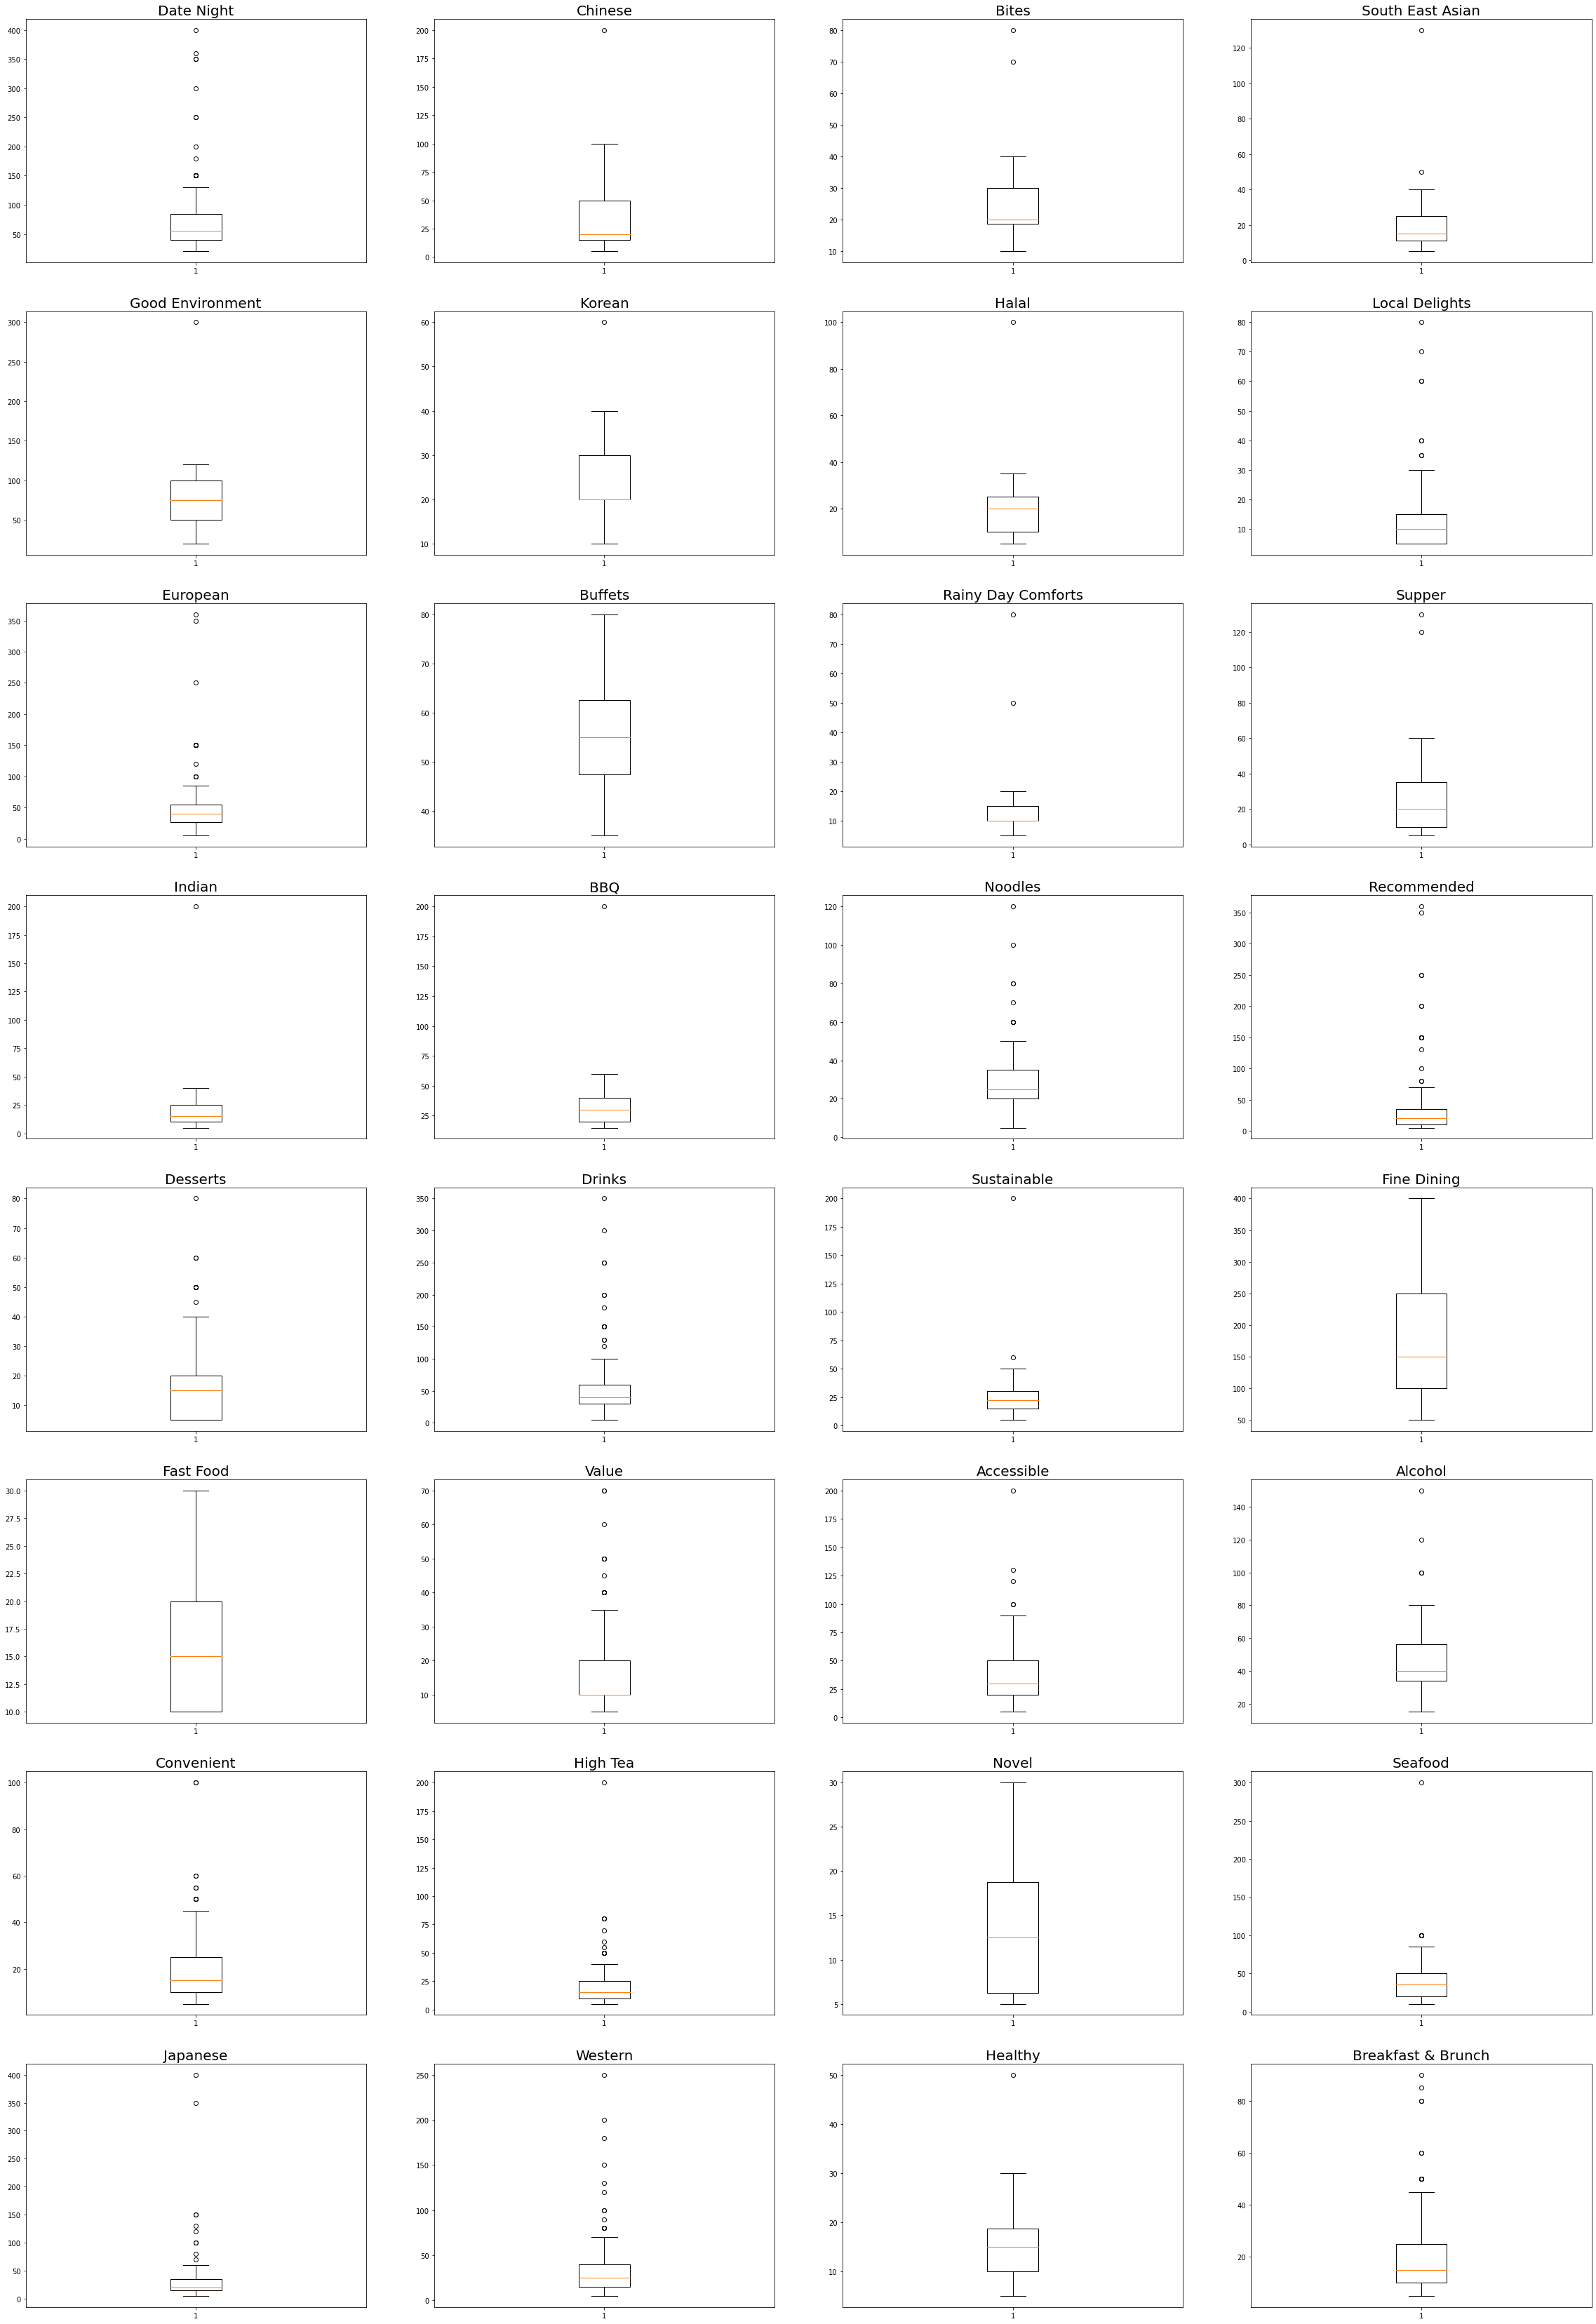

In [43]:
fig, axs = plt.subplots(8,4, figsize=(40, 60))

for index, name in enumerate(list_cleaned_categories):
    cat_df = box_df[box_df[name] == 1]
    axs[index//4,index%4].boxplot(cat_df['cleaned_price'])
    axs[index//4,index%4].set_title(name, fontsize=20)
    


# for i in range(0,4):
#     for j in range(0,13):
#         for category in list_cleaned_categories:
#             cat_df = box_df[box_df[category] == 1]
#             axs[i][j].boxplot(cat_df['cleaned_price'])
            


#### Box & Whiskers for Price By Region

In [44]:
box_df

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Alcohol,Convenient,High Tea,Novel,Seafood,Japanese,Western,Healthy,Breakfast & Brunch,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
0,https://www.burpple.com/99-thai-story?bp_ref=%...,99 Thai Story,Bishan,~$15/pax,['Thai'],\nSteamed Fish with Lemon Garlic Sauce\nGotten...,Khaw Han Chung,"Jan 6, 2022",15.0,[South East Asian],...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/aburi-en-jem?bp_ref=%2...,Aburi-EN (Jem),Jurong East,~$25/pax,"['Delivery', 'Japanese']",\nAburi 9 Kinds Kaisen Chirashi Don | $35++\nF...,Iced Americano,5d ago,25.0,"[Convenient, Japanese]",...,0,1,0,0,0,1,0,0,0,West
0,https://www.burpple.com/ah-loy-thai?bp_ref=%2F...,Ah Loy Thai,Bugis,~$10/pax,"['Thai', 'Cheap & Good', 'Good For Groups']",\nTom yam fried rice\nThe tom yam fried rice w...,Ethel Tan,16m ago,10.0,"[South East Asian, Value, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/ajummas?bp_ref=%2Ff%2F...,Ajumma's (Funan),City Hall,~$15/pax,"['Korean', 'Delivery']",\nCrispy Samgyeopsal With Creamy Scrambled Egg...,The Hungry Fatty,3h ago,15.0,"[Korean, Convenient]",...,0,1,0,0,0,0,0,0,0,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,https://www.burpple.com/9-plus-cafe?bp_ref=%2F...,9 Plus Cafe,Aljunied,~$5/pax,['Hawker Food'],\nBa Chor Mee\nFrom the stall that primarily s...,Thiam Peng Tan,Jul 6 at 12:43am,5.0,[Local Delights],...,0,0,0,0,0,0,0,0,0,East
0,https://www.burpple.com/49-seats-4?bp_ref=%2Ff...,49 Seats (The Centrepoint),Somerset,~$20/pax,"['Western', 'Pasta']",\nSprite & Coke Float \n\nSprite float & Coke ...,Zoey Belle,9m ago,20.0,"[Western, Western, Noodles]",...,0,0,0,0,0,0,1,0,0,Central
0,https://www.burpple.com/alexandra-village-food...,Alexandra Village Food Centre,Alexandra,~$10/pax,"['Hawker Food', 'Cheap & Good']",\nGood oyster omelette \nOyster omelette @ $7\...,Gerard Lim,4m ago,10.0,"[Local Delights, Value]",...,0,0,0,0,0,0,0,0,0,West
0,https://www.burpple.com/abc-brickworks-market-...,ABC Brickworks Market & Food Centre,Bukit Merah,~$10/pax,"['Burpple Guides', 'Hawker Food', 'Cheap & Good']",\nJuicy chicken wings and get the chicken sata...,Jason Ng,14m ago,10.0,"[Recommended, Local Delights, Value]",...,0,0,0,0,0,0,0,0,0,Central


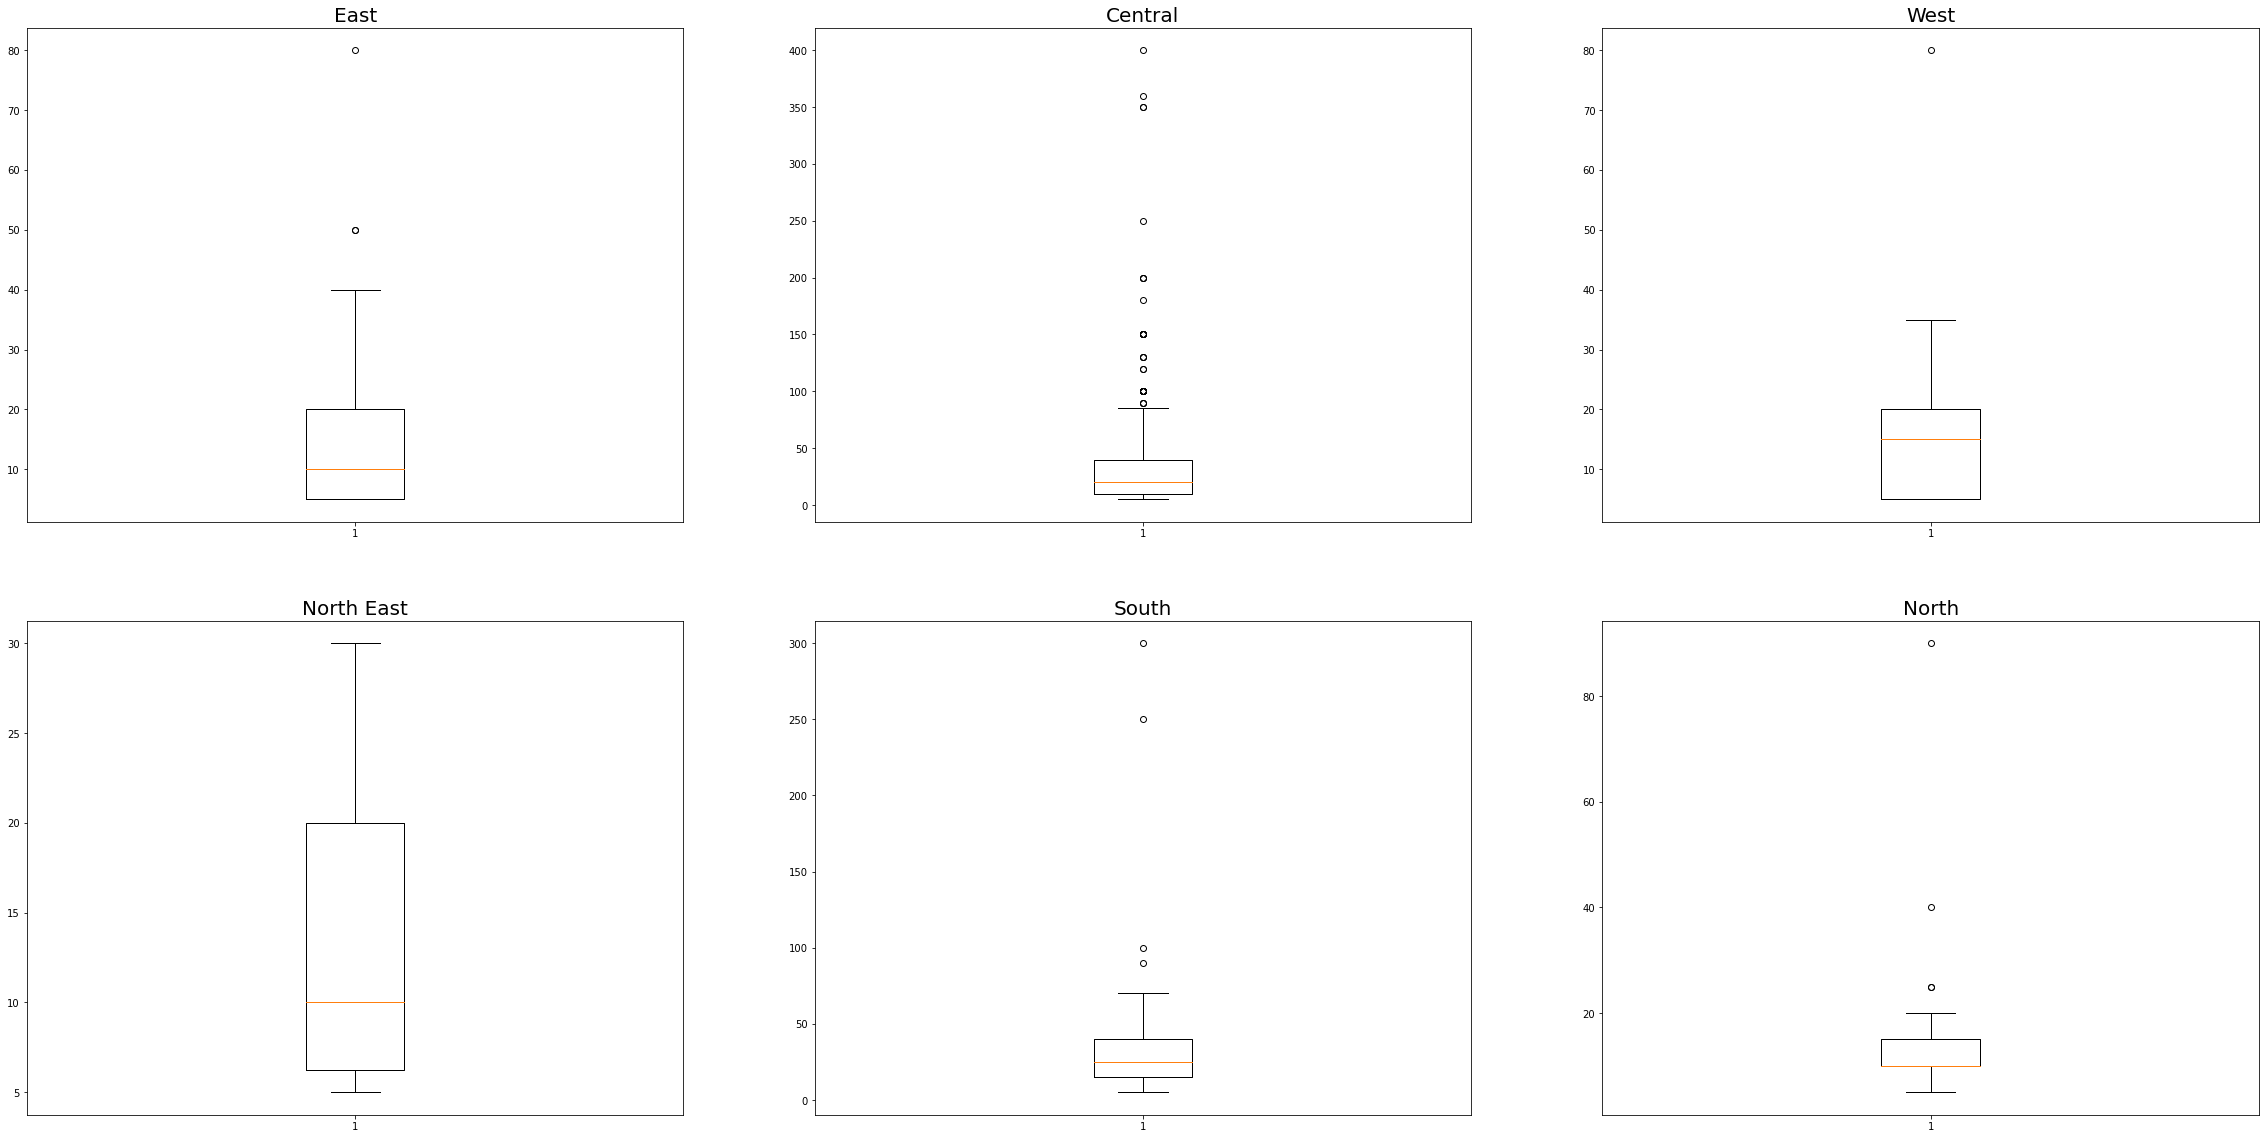

In [45]:
fig, axs = plt.subplots(2,3, figsize=(40, 20))

for index, name in enumerate(box_df['region'].unique()):
    cat_df = box_df[box_df['region'] == name]
    axs[index//3,index%3].boxplot(cat_df['cleaned_price'])
    axs[index//3,index%3].set_title(name, fontsize=20)


#### Histogram for Price

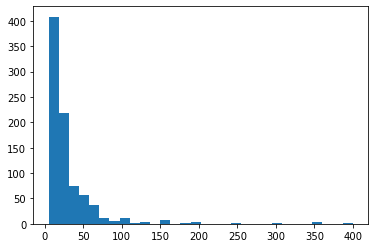

In [46]:
plt.hist(box_df['cleaned_price'], bins = 30) ## find the x limit thing
plt.show()

#### Number of Reviews by Date

In [47]:
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)

In [48]:
cleaned_dates = []
for idx, row in cleaned_data.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

In [49]:
cleaned_data['cleaned_dates'] = cleaned_dates

In [50]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Convenient,High Tea,Novel,Seafood,Japanese,Western,Healthy,Breakfast & Brunch,region,cleaned_dates
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,East,2023-03-15
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,East,2022-07-30
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,East,2022-07-30
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,East,2022-07-30
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,East,2022-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-27
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-26
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-09
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-01


In [51]:
from dateutil.parser import parse
dt = parse('Mon Feb 15 2010')
cleaned_data['mmyyyy'] = cleaned_data['cleaned_dates'].apply(lambda x: date(x.year, x.month, 1))

In [52]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,High Tea,Novel,Seafood,Japanese,Western,Healthy,Breakfast & Brunch,region,cleaned_dates,mmyyyy
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2023-03-15,2023-03-01
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-27,2020-10-01
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-26,2020-10-01
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-09,2020-10-01
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-01,2020-10-01


In [53]:
df_by_month = cleaned_data.groupby('mmyyyy')['url'].count().reset_index().iloc[:-1, :]
df_by_month

,mmyyyy,url
0,2020-01-01,944
1,2020-02-01,946
2,2020-03-01,1163
3,2020-04-01,497
4,2020-05-01,393
5,2020-06-01,522
6,2020-07-01,840
7,2020-08-01,1148
8,2020-09-01,1102
9,2020-10-01,1218


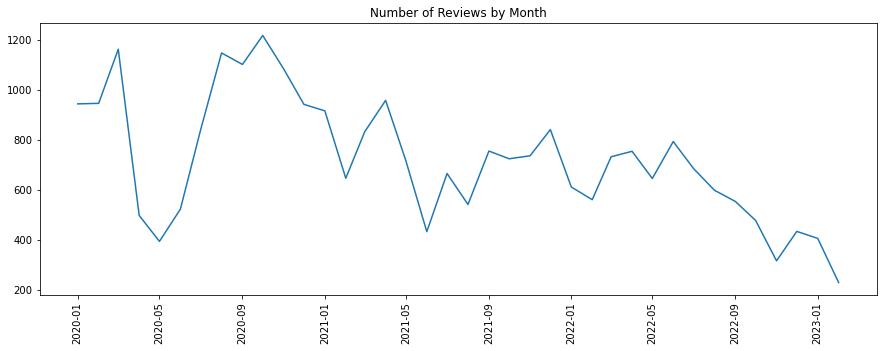

In [54]:
plt.figure(figsize=(15,5))
plt.plot(df_by_month['mmyyyy'],df_by_month['url'] )
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Month')
plt.show()


In [55]:
df_by_date = cleaned_data.groupby('cleaned_dates')['url'].count().reset_index().iloc[:-15,:]
df_by_date

,cleaned_dates,url
0,2020-01-01,41
1,2020-01-02,37
2,2020-01-03,38
3,2020-01-04,28
4,2020-01-05,56
...,...,...
1149,2023-02-24,8
1150,2023-02-25,9
1151,2023-02-26,22
1152,2023-02-27,2


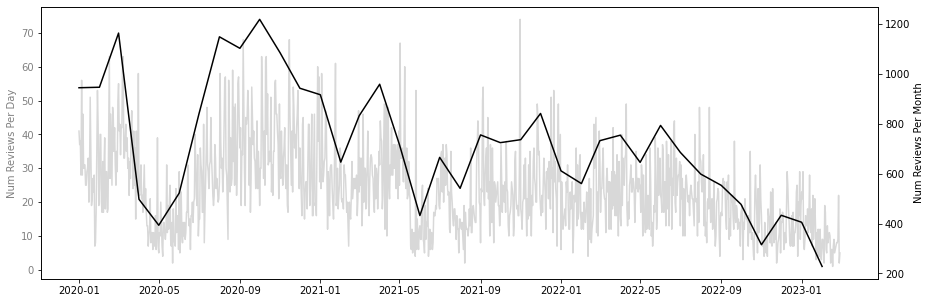

In [57]:
fig, ax1 = plt.subplots(figsize=(15,5))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

ax1.plot(df_by_date['cleaned_dates'],df_by_date['url'],  color = 'grey', alpha = 0.3)
ax1.set_ylabel('Num Reviews Per Day', color = 'grey')
ax1.tick_params(axis = 'y', labelcolor = 'grey')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df_by_month['mmyyyy'],df_by_month['url'], color = 'black')
ax2.set_ylabel('Num Reviews Per Month')
ax2.grid(False)

# plt.xticks(rotation = 90)
# plt.title('Number of Reviews by Date')
# plt.show()